| 평가문항                                    | 상세기준                                                              |
|--------------------------------------------|---------------------------------------------------------------------|
| 1. 이미지 분류기 모델이 성공적으로 만들어졌는가? | 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음 |
| 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? | 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음 |
| 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? | 85% 이상 도달하였음                                                   |


# __가위바위보 분류기 만들기__
## Trial 1.  
내 데이터로 학습 후 → 다른 사람 데이터로 테스트

In [1]:
from PIL import Image, ImageOps 
import glob

In [2]:
# 이미지 resize 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "trial_1/Scissor"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_1/Rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_1/Paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

101  images to be resized.
101  images resized.
138  images to be resized.
138  images resized.
124  images to be resized.
124  images resized.


In [4]:
import numpy as np
import glob
from PIL import Image
import os

def load_data(img_path):
    categories = ['scissor', 'rock', 'paper']
    img_size = 28
    color = 3
    
    # 이미지 파일의 총 수를 계산합니다.
    total_image_count = sum([len(glob.glob(f"{img_path}/{category}/*.jpg")) for category in categories])
    
    # 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(total_image_count*img_size*img_size*color, dtype=np.int32).reshape(total_image_count, img_size, img_size, color)
    labels = np.zeros(total_image_count, dtype=np.int32)

    idx = 0
    for label, category in enumerate(categories):
        for file in glob.iglob(f"{img_path}/{category}/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
            labels[idx] = label  # 가위: 0, 바위: 1, 보: 2
            idx += 1
            
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = "./trial_1"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 363 입니다.
x_train shape: (363, 28, 28, 3)
y_train shape: (363,)


라벨:  0


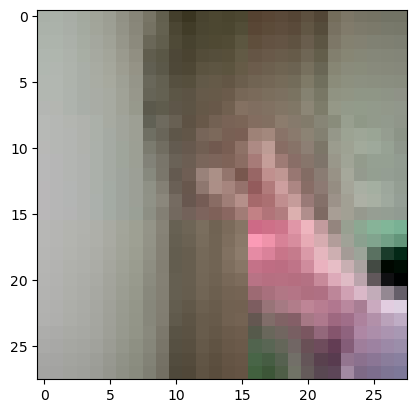

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  1


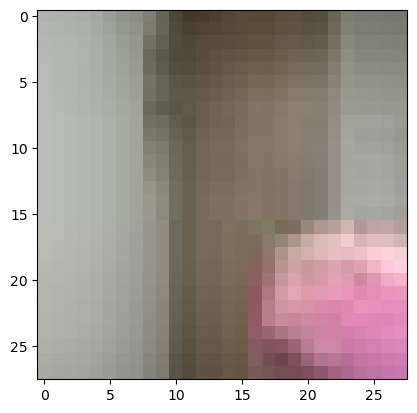

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[150])
print('라벨: ', y_train[150])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  2


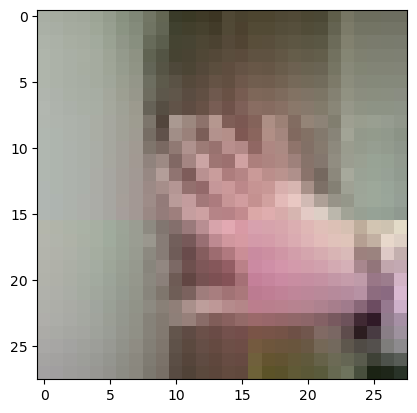

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[300])
print('라벨: ', y_train[300])   # 가위 : 0, 바위 : 1, 보 : 2

In [8]:
# 딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()




Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)


Epoch 1/10


10/10 [==============================] - 2s 59ms/step - loss: 31.9592 - accuracy: 0.4276 - val_loss: 42.8304 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 5.5597 - accuracy: 0.4759 - val_loss: 25.1508 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 4.2269 - accuracy: 0.5103 - val_loss: 0.4473 - val_accuracy: 0.8630
Epoch 4/10
10/10 [==============================] - 0s 15ms/step - loss: 2.1110 - accuracy: 0.5207 - val_loss: 3.0995 - val_accuracy: 0.6575
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 0.7596 - accuracy: 0.7517 - val_loss: 6.2072 - val_accuracy: 0.3014
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2502 - accuracy: 0.9276 - val_loss: 4.4975 - val_accuracy: 0.5890
Epoch 7/10
10/10 [==============================] - 0s 17ms/step - loss: 0.2485 - accuracy: 0.8897 - val_loss: 3.1878 - val_accuracy: 0.6301

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "trial_1/test/scissor"
resize_images(image_dir_path)

image_dir_path = "trial_1/test/rock"
resize_images(image_dir_path)

image_dir_path = "trial_1/test/paper"
resize_images(image_dir_path)

image_dir_path = "trial_1/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

100  images to be resized.
100  images resized.
102  images to be resized.
102  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 302 입니다.
x_test shape: (363, 28, 28, 3)
y_test shape: (363,)


라벨:  0


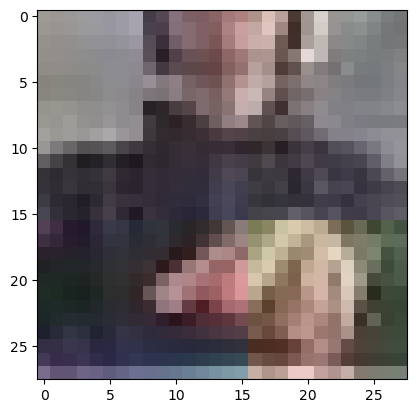

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
print('라벨: ', y_test[0])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  1


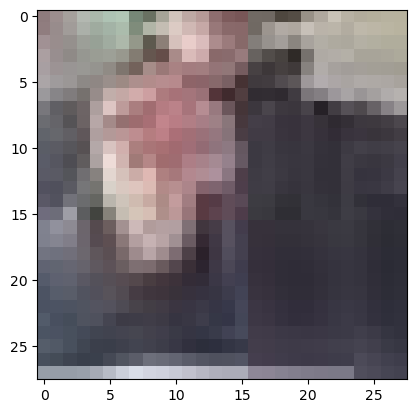

In [12]:
plt.imshow(x_test[150])
print('라벨: ', y_test[150])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  2


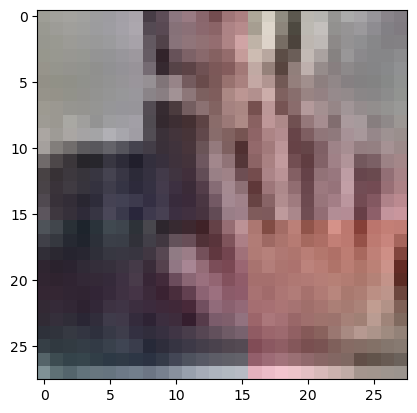

In [13]:
plt.imshow(x_test[300])
print('라벨: ', y_test[300])   # 가위 : 0, 바위 : 1, 보 : 2

In [14]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 7.5452 - accuracy: 0.3179 - 139ms/epoch - 14ms/step
test_loss: 7.545173168182373 
test_accuracy: 0.3178808093070984


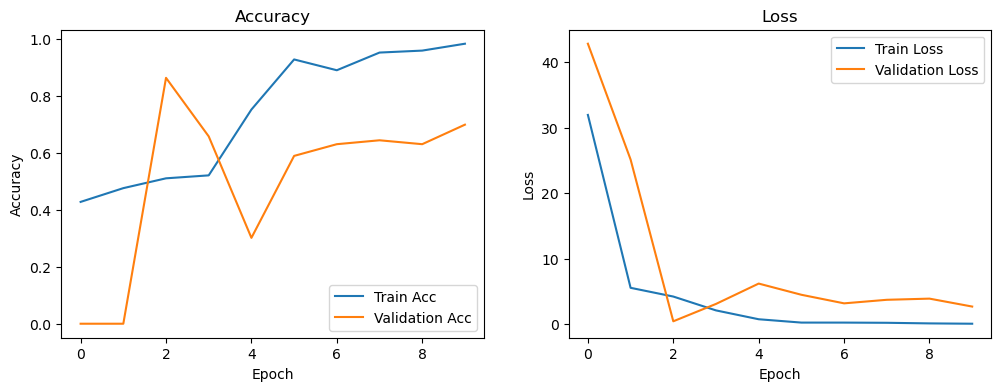

In [15]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

정확도가 31.79로 높지 않다.  
내가 찍은 이미지와 대호님이 찍은 이미지의 각도 등이 현저하게 다르므로 어느정도 예상 가능한 결과.

## Trial 2.  
팀원 데이터 전체 합치기 → train/test data split
나, 대호님, 경표님 데이터를 모두 활용하여 학습 및 테스트를 진행해보자.  
(대호님이 만들어주신 데이터셋을 사용. 이미지 사이즈가 이미 28x28로 조정되었고, 셔플되어있다.)

In [19]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

def load_data(img_path):
    categories = ['scissor', 'rock', 'paper']
    img_size = 28
    color = 3
    
    total_image_count = sum([len(glob.glob(f"{img_path}/{category}/*.jpg")) for category in categories])
    
    imgs = np.zeros(total_image_count*img_size*img_size*color, dtype=np.int32).reshape(total_image_count, img_size, img_size, color)
    labels = np.zeros(total_image_count, dtype=np.int32)

    idx = 0
    for label, category in enumerate(categories):
        for file in glob.iglob(f"{img_path}/{category}/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx, :, :, :] = img
            labels[idx] = label
            idx += 1
            
    print("총 이미지 개수:", idx)
    return imgs, labels

image_dir_path = "./trial_2"
(x, y) = load_data(image_dir_path)
x_norm = x / 255.0

# 데이터 분리: 훈련 데이터 80%, 테스트 데이터 20%
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

총 이미지 개수: 835
x_train shape: (668, 28, 28, 3)
y_train shape: (668,)
x_test shape: (167, 28, 28, 3)
y_test shape: (167,)


In [20]:
# 딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (

In [21]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2)

Epoch 1/20
17/17 [==============================] - 1s 25ms/step - loss: 1.0932 - accuracy: 0.4064 - val_loss: 1.0685 - val_accuracy: 0.5896
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 1.0434 - accuracy: 0.5375 - val_loss: 1.0236 - val_accuracy: 0.4925
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.9839 - accuracy: 0.5318 - val_loss: 0.9536 - val_accuracy: 0.6567
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.9304 - accuracy: 0.5131 - val_loss: 0.8913 - val_accuracy: 0.6940
Epoch 5/20
17/17 [==============================] - 0s 12ms/step - loss: 0.8641 - accuracy: 0.6236 - val_loss: 0.8547 - val_accuracy: 0.7388
Epoch 6/20
17/17 [==============================] - 0s 14ms/step - loss: 0.8083 - accuracy: 0.6629 - val_loss: 0.7669 - val_accuracy: 0.6791
Epoch 7/20
17/17 [==============================] - 0s 12ms/step - loss: 0.7486 - accuracy: 0.6948 - val_loss: 0.6796 - val_accuracy: 0.8060
Epoch 8/20
17

In [22]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

6/6 - 0s - loss: 0.2193 - accuracy: 0.9162 - 76ms/epoch - 13ms/step
test_loss: 0.2192762941122055 
test_accuracy: 0.916167676448822


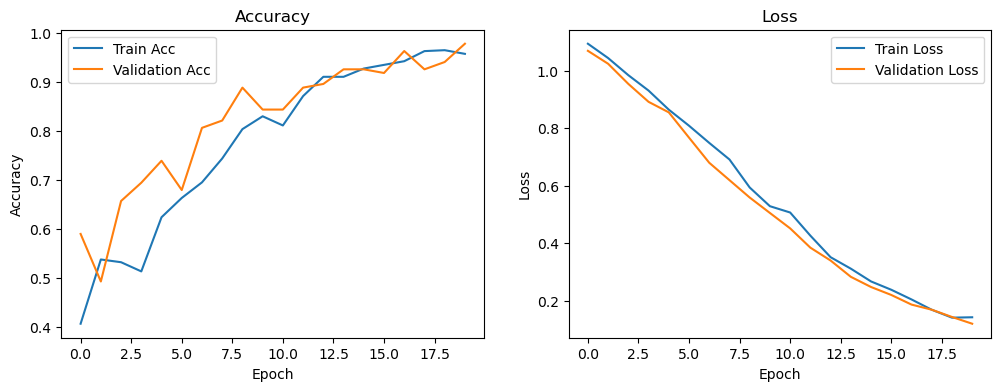

In [23]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

동일한 데이터셋을 통해 학습과 테스트를 진행했으므로 정확도가 매우 높게 측정된다. (91.65)

## Trial 3.  
팀원 데이터 전체로 학습 후 → 다른 팀 데이터로 테스트  
도현님, 민지님, 예빈님 데이터셋으로 테스트

In [24]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/scissor"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

265  images to be resized.
265  images resized.
284  images to be resized.
284  images resized.
286  images to be resized.
286  images resized.


In [25]:
image_dir_path = "./trial_3"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

총 이미지 개수: 835
x_train shape: (835, 28, 28, 3)
y_train shape: (835,)


In [26]:
# 딥러닝 네트워크 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (

In [27]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2)

Epoch 1/20
21/21 [==============================] - 2s 29ms/step - loss: 6.7361 - accuracy: 0.4686 - val_loss: 2.4302 - val_accuracy: 0.4671
Epoch 2/20
21/21 [==============================] - 0s 15ms/step - loss: 1.6280 - accuracy: 0.6257 - val_loss: 1.3190 - val_accuracy: 0.6108
Epoch 3/20
21/21 [==============================] - 0s 14ms/step - loss: 0.8249 - accuracy: 0.7500 - val_loss: 1.3455 - val_accuracy: 0.4850
Epoch 4/20
21/21 [==============================] - 0s 14ms/step - loss: 0.5492 - accuracy: 0.8204 - val_loss: 0.8291 - val_accuracy: 0.6707
Epoch 5/20
21/21 [==============================] - 0s 14ms/step - loss: 0.4026 - accuracy: 0.8293 - val_loss: 0.6257 - val_accuracy: 0.7545
Epoch 6/20
21/21 [==============================] - 0s 18ms/step - loss: 0.2524 - accuracy: 0.9072 - val_loss: 1.0874 - val_accuracy: 0.5509
Epoch 7/20
21/21 [==============================] - 0s 23ms/step - loss: 0.2038 - accuracy: 0.9311 - val_loss: 0.4170 - val_accuracy: 0.8683
Epoch 8/20
21

In [28]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "trial_3/test/scissor"
resize_images(image_dir_path)

image_dir_path = "trial_3/test/rock"
resize_images(image_dir_path)

image_dir_path = "trial_3/test/paper"
resize_images(image_dir_path)

image_dir_path = "trial_3/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
총 이미지 개수: 900
x_test shape: (835, 28, 28, 3)
y_test shape: (835,)


In [29]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 6.8594 - accuracy: 0.2922 - 150ms/epoch - 5ms/step
test_loss: 6.859447479248047 
test_accuracy: 0.2922222316265106


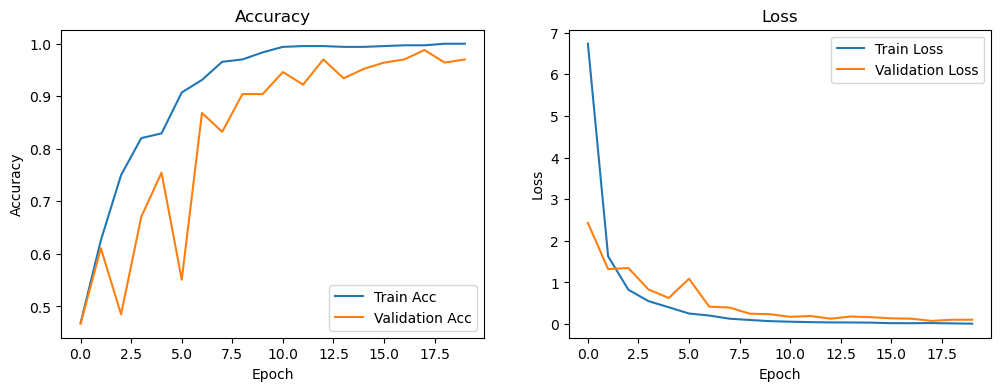

In [30]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

정확도가 29.22. 딥러닝 모델 설계를 수정해보자.

In [31]:
# 딥러닝 네트워크 설계 (대호님 코드 사용)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  12
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  

In [32]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
21/21 [==============================] - 2s 36ms/step - loss: 3.4135 - accuracy: 0.4087 - val_loss: 1.1749 - val_accuracy: 0.1677
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 1.0526 - accuracy: 0.4895 - val_loss: 1.4196 - val_accuracy: 0.0060
Epoch 3/50
21/21 [==============================] - 1s 30ms/step - loss: 0.9068 - accuracy: 0.5973 - val_loss: 1.3749 - val_accuracy: 0.0299
Epoch 4/50
21/21 [==============================] - 1s 25ms/step - loss: 0.7843 - accuracy: 0.6557 - val_loss: 0.9499 - val_accuracy: 0.5090
Epoch 5/50
21/21 [==============================] - 1s 29ms/step - loss: 0.6023 - accuracy: 0.7500 - val_loss: 0.4514 - val_accuracy: 0.9042
Epoch 6/50
21/21 [==============================] - 1s 27ms/step - loss: 0.5143 - accuracy: 0.8039 - val_loss: 0.5390 - val_accuracy: 0.8263
Epoch 7/50
21/21 [==============================] - 1s 29ms/step - loss: 0.3669 - accuracy: 0.8653 - val_loss: 0.4388 - val_accuracy: 0.7964
Epoch 8/50
21

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 3.6052 - accuracy: 0.4378 - 340ms/epoch - 12ms/step
test_loss: 3.6052463054656982 
test_accuracy: 0.4377777874469757


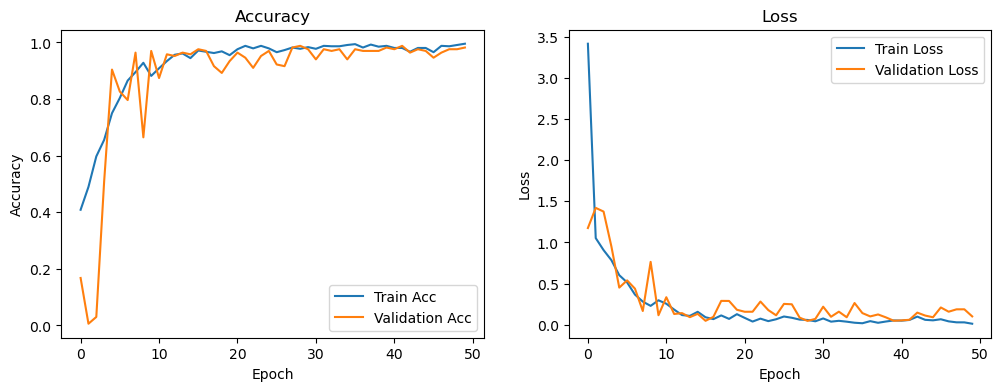

In [34]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

정확도가 29.22에서 43.78로 많이 향상되긴 했지만, 아직도 절반 미만의 정확도를 나타낸다.

# 회고  
아직 정확도가 많이 낮습니다.  
각자 데이터 작성에 활용한 배경이나 이런 게 다 달라서 문제가 발생하는 것도 있는 것 같고,  
28x28로 resize하면 가위, 바위, 보를 구분하기 어렵게 되는 문제도 있는 것 같습니다.
해결하기 위해서 다양한 시도를 해볼 수 있을 것 같은데...업데이트를 좀 더 진행해봐야겠습니다.